# This is Practice on the Titanic Dataset (kaggle) fully Focused on Data Analysis 

In [3]:
# Importing Basic Libraries
import numpy as np 
import pandas as pd

In [7]:
#Creating a Variable "df" to stored our dataset into

df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Checking the basic information of the data
df.shape

(891, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
# Lets check some descriptive Statestics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [31]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [39]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [37]:
df.duplicated().sum()

0

In [45]:
df['Pclass'].unique()
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

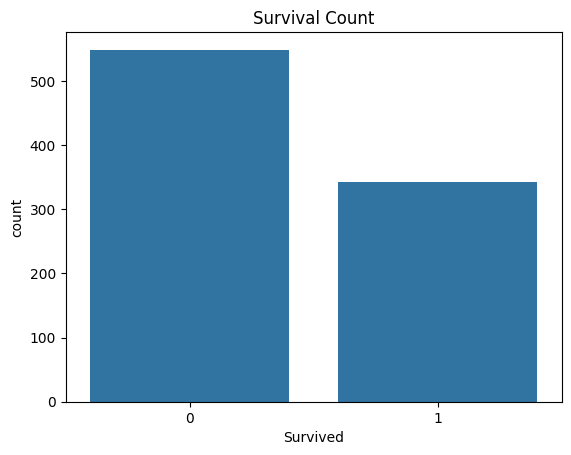

In [51]:
# Visualizing 
import seaborn as sns
import matplotlib.pyplot as plt

# countplot of servivors
sns.countplot(data = df, x = 'Survived')
plt.title('Survival Count')
plt.show()

## Handeling Missing Values

In [56]:
# checck missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
# Handeling Missing Values in the age which is numerical coloumn 

#use median to fill the value in the age 
df['Age'].fillna(df['Age'].median(), inplace = True)

In [62]:
# For the cabin, Let's drop it. doesnot going to be helpful
df.drop(columns = ['Cabin'], inplace = True)

In [66]:
# for the embarked lets use mod
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [70]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

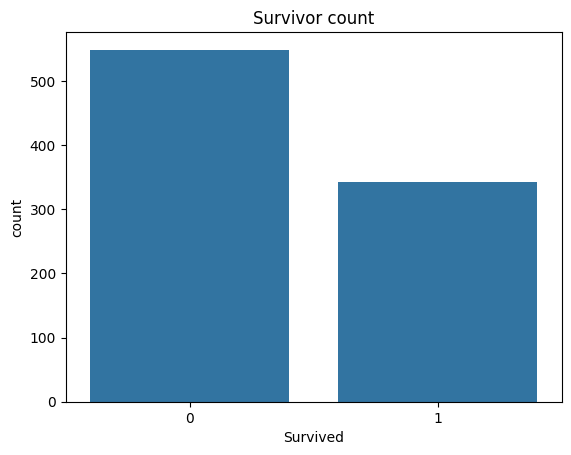

In [78]:
# Let's do some visualization 
sns.countplot(data = df, x = 'Survived')
plt.title("Survivor count")
plt.show()

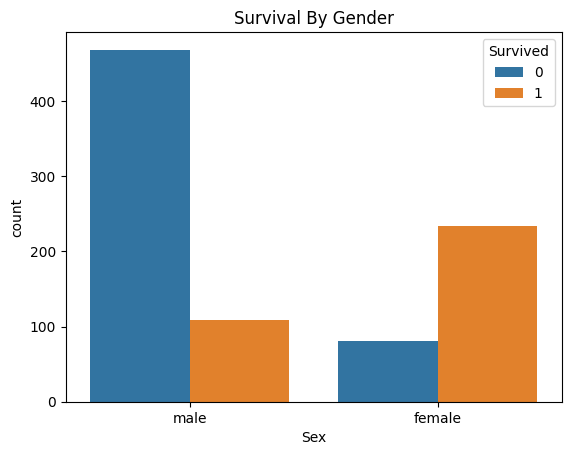

In [80]:
# Survival by gender
sns.countplot(data = df, x = 'Sex', hue = 'Survived')
plt.title("Survival By Gender")
plt.show()

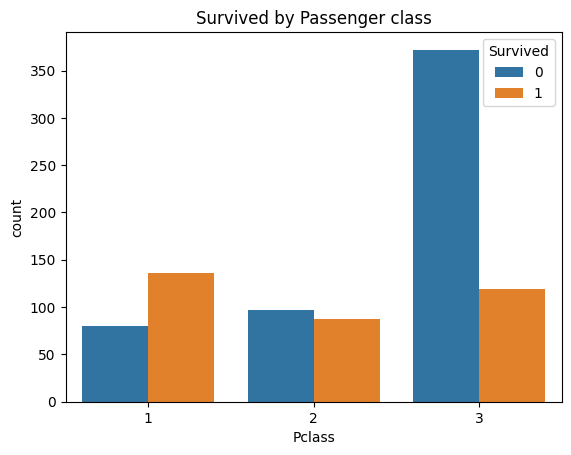

In [82]:
# Survived by Passenger class
sns.countplot(data = df, x = 'Pclass', hue = 'Survived')
plt.title("Survived by Passenger class")
plt.show()

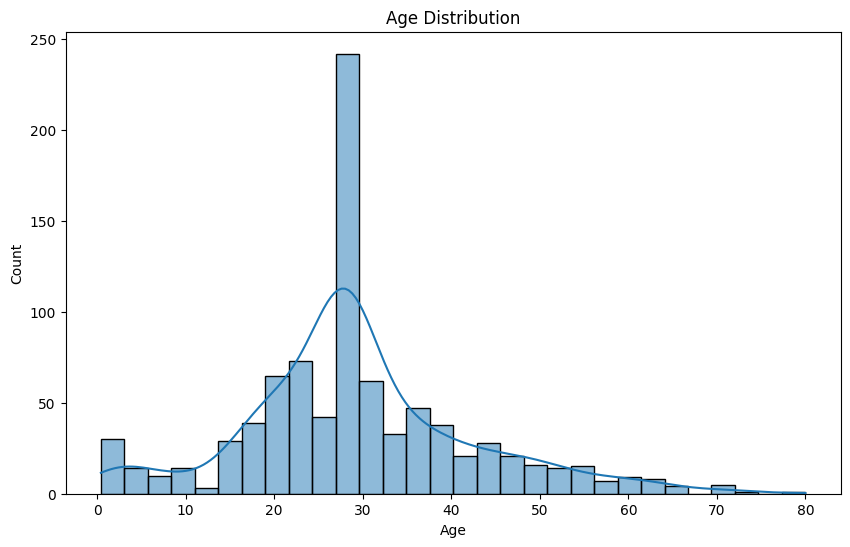

In [90]:
# let's visualize age distribution
plt.figure(figsize = (10, 6))
sns.histplot(data = df , x = 'Age', bins = 30, kde = True)
plt.title("Age Distribution")
plt.show()

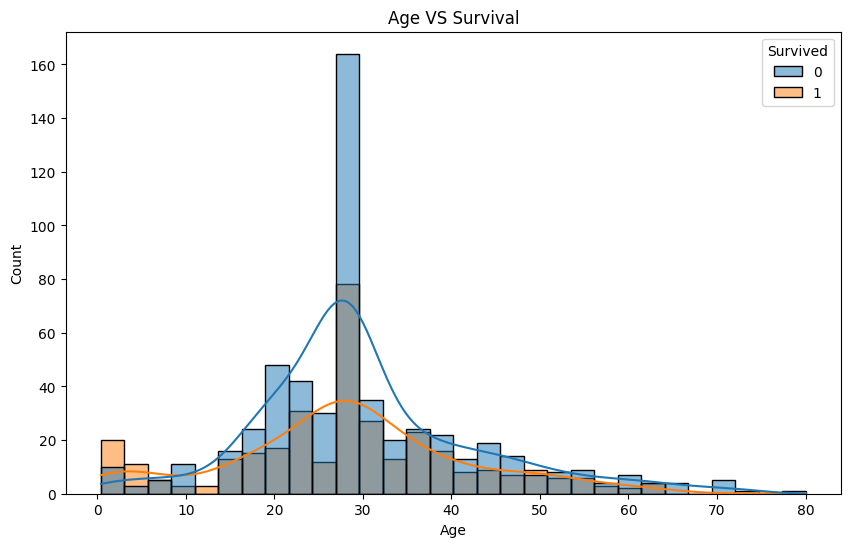

In [96]:
# age vs Survival 
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Age', hue = 'Survived', bins = 30, kde = True)
plt.title("Age VS Survival")
plt.show()

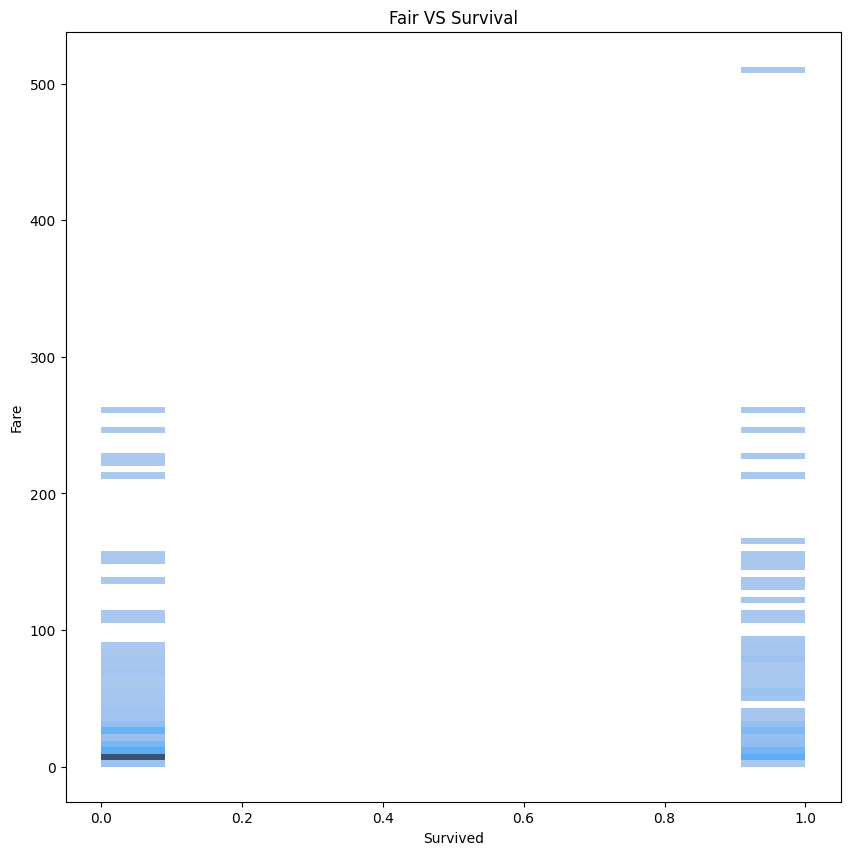

In [106]:
# Fair vs Survival
plt.figure(figsize=(10, 10))
sns.histplot(data = df, x  = 'Survived', y = 'Fare') 
plt.title("Fair VS Survival")
plt.show()